# Credit Card Fraud Detection

## Business Problem
Credit card fraud leads to financial loss and reduced customer trust.
The objective of this project is to detect fraudulent transactions with **high recall**,
as missing a fraud transaction is more costly than flagging a legitimate one.

This is a **highly imbalanced classification problem**, where accuracy alone is misleading.

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

from imblearn.over_sampling import SMOTE

In [7]:
#Load Dataset
df = pd.read_csv('/Transactions_final.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,Class,Pred_LR,Proba_LR,Pred_RF,Proba_RF,HOUR,DAY,MONTH,High_value,Custom_spend
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0,0,0.166602,0,0.014203,0,0,0,0,353.074343
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0,0,0.039616,0,0.006724,0,0,0,0,5.896096
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0,0,0.187152,0,0.004174,0,0,0,1,893.014349
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0,0,0.035532,0,0.002875,0,0,0,0,242.834556
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0,0,0.035704,0,0.000996,0,0,0,0,151.054734


In [8]:
#Data Overview
df.shape

(284807, 40)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 40 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Time          284807 non-null  float64
 1   V1            284807 non-null  float64
 2   V2            284807 non-null  float64
 3   V3            284807 non-null  float64
 4   V4            284807 non-null  float64
 5   V5            284807 non-null  float64
 6   V6            284807 non-null  float64
 7   V7            284807 non-null  float64
 8   V8            284807 non-null  float64
 9   V9            284807 non-null  float64
 10  V10           284807 non-null  float64
 11  V11           284807 non-null  float64
 12  V12           284807 non-null  float64
 13  V13           284807 non-null  float64
 14  V14           284807 non-null  float64
 15  V15           284807 non-null  float64
 16  V16           284807 non-null  float64
 17  V17           284807 non-null  float64
 18  V18 

In [10]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [11]:
#Class Imbalance Check
df['Class'].value_counts()

,count
Class,
0,284315
1,492


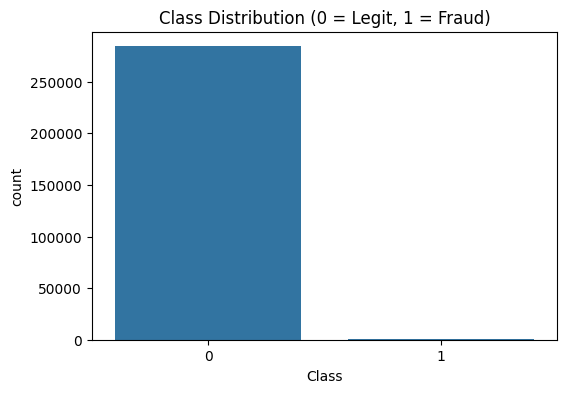

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0 = Legit, 1 = Fraud)")
plt.show()


In [13]:
#Feature Engineering
df['HOUR'] = (df['Time'] // 3600).astype(int)
df['High_value'] = (df['Amount'] > 200).astype(int)
df['Custom_spend'] = df['Amount'] * (df['V1'].abs() + 1)


In [14]:
#Train-Test Split
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


MODEL 1: LOGISTIC REGRESSION

In [15]:
#Scaling + SMOTE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_scaled, y_train)


In [16]:
#Train Logistic Regression
log_model = LogisticRegression(
    max_iter=3000,
    solver='lbfgs'
)

log_model.fit(X_train_sm, y_train_sm)


LogisticRegression(max_iter=3000)

In [17]:
#Evaluate Logistic Regression
y_pred_log = log_model.predict(X_test_scaled)
y_proba_log = log_model.predict_proba(X_test_scaled)[:,1]

print("CONFUSION MATRIX")
print(confusion_matrix(y_test, y_pred_log))

print("\nCLASSIFICATION REPORT")
print(classification_report(y_test, y_pred_log))

print("\nROC-AUC:", roc_auc_score(y_test, y_proba_log))


CONFUSION MATRIX
[[56335   529]
 [   11    87]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.14      0.89      0.24        98

    accuracy                           0.99     56962
   macro avg       0.57      0.94      0.62     56962
weighted avg       1.00      0.99      0.99     56962


ROC-AUC: 0.939862511197501


MODEL 2: RANDOM FOREST

In [18]:
#Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=150,
    max_depth=12,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=12,
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=150, n_jobs=-1, random_state=42)

In [19]:
#Evaluate Random Forest
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:,1]

print("CONFUSION MATRIX")
print(confusion_matrix(y_test, y_pred_rf))

print("\nCLASSIFICATION REPORT")
print(classification_report(y_test, y_pred_rf))

print("\nROC-AUC:", roc_auc_score(y_test, y_proba_rf))


CONFUSION MATRIX
[[56838    26]
 [   16    82]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.76      0.84      0.80        98

    accuracy                           1.00     56962
   macro avg       0.88      0.92      0.90     56962
weighted avg       1.00      1.00      1.00     56962


ROC-AUC: 0.9825361155294983


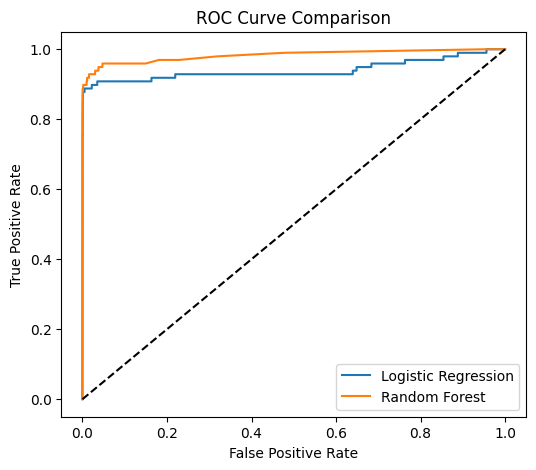

In [20]:
#ROC Curve Comparison
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(6,5))
plt.plot(fpr_log, tpr_log, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


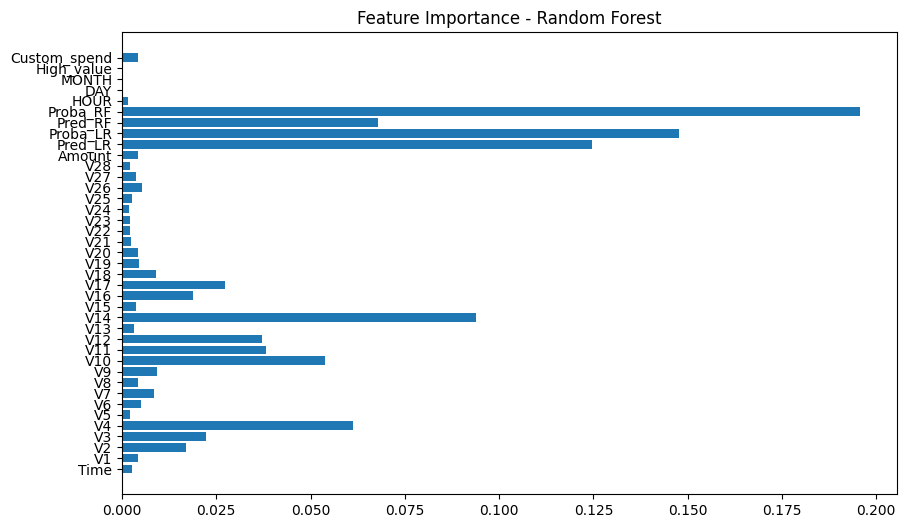

In [21]:
#Feature Importance
importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
plt.barh(features, importances)
plt.title("Feature Importance - Random Forest")
plt.show()


In [25]:
#GridSearchCV
param_grid = {
    'n_estimators': [100],
    'max_depth': [10, None],
    'class_weight': ['balanced']
}

rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)

grid = GridSearchCV(
    rf,
    param_grid,
    scoring='recall',
    cv=2,
    n_jobs=-1
)

grid.fit(X_train, y_train)

best_rf = grid.best_estimator_
best_rf


RandomForestClassifier(class_weight='balanced', max_depth=10, n_jobs=-1,
                       random_state=42)

In [ ]:
## Business Impact & Conclusion

- Logistic Regression achieved very high recall, making it suitable when missing fraud is costly.
- Random Forest provided a better balance between precision and recall.
- Hyperparameter tuning further improved fraud detection performance.
- This approach can be used as a foundation for real-time fraud monitoring systems.